# 1. Import Dependency


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score


In [2]:
# Reading the dataset 
df = pd.read_csv("riceClassification.csv")
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
# Drop the id column 
df.drop(["id"], inplace = True, axis = 1)

In [4]:
# Dime of the dataset
print("Number of Row = ", df.shape[0],", and number of column = ", df.shape[1])

Number of Row =  18185 , and number of column =  11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [6]:
# Missing values 
Missing_values = df.isnull().sum().sort_values(ascending = False)
Missing_percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)
pd.concat([Missing_values, Missing_percent], axis=1, keys=['Missing_values', 'Missing_percent']).transpose()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Missing_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No Missing Value in the dataset

In [7]:
## Checking Duplicates Values
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


No any Duplicate Row 

In [8]:
# Statistical description of dataset
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


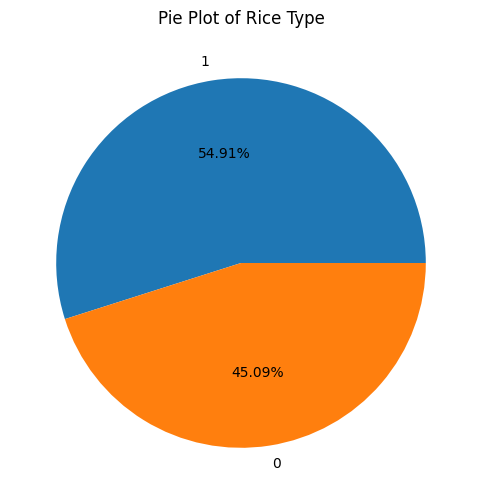

In [9]:
# Pie plot the class column
count = df["Class"].value_counts()
count
labels = count.index
labels

plt.figure(figsize = (6,6))
plt.pie(count.values, labels = labels, autopct = "%1.2f%%")
plt.title("Pie Plot of Rice Type")
plt.show()

 Form the above Pie plot we can conclued that the dataset is not an imbalanced 

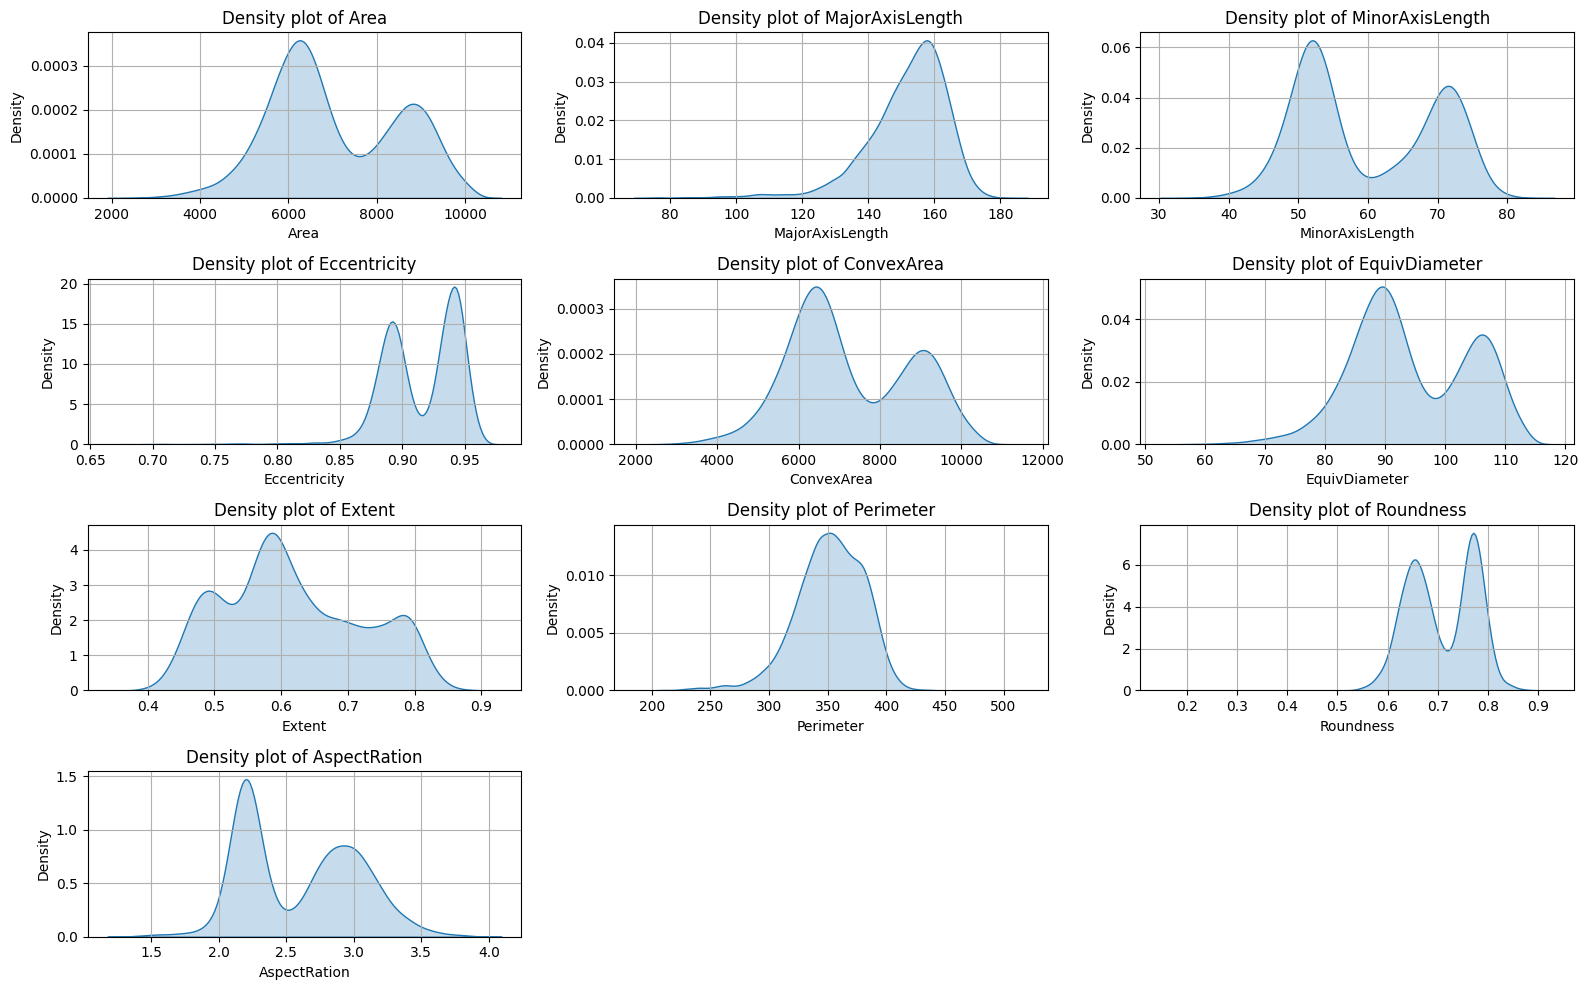

In [10]:
# Density plot of the columns
plt.figure(figsize = (16,10))
for i,col in enumerate(df.columns[0:10]): # Class column are not taken
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data = df[col], fill = True)
    plt.title(f"Density plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)

plt.tight_layout()
plt.show()

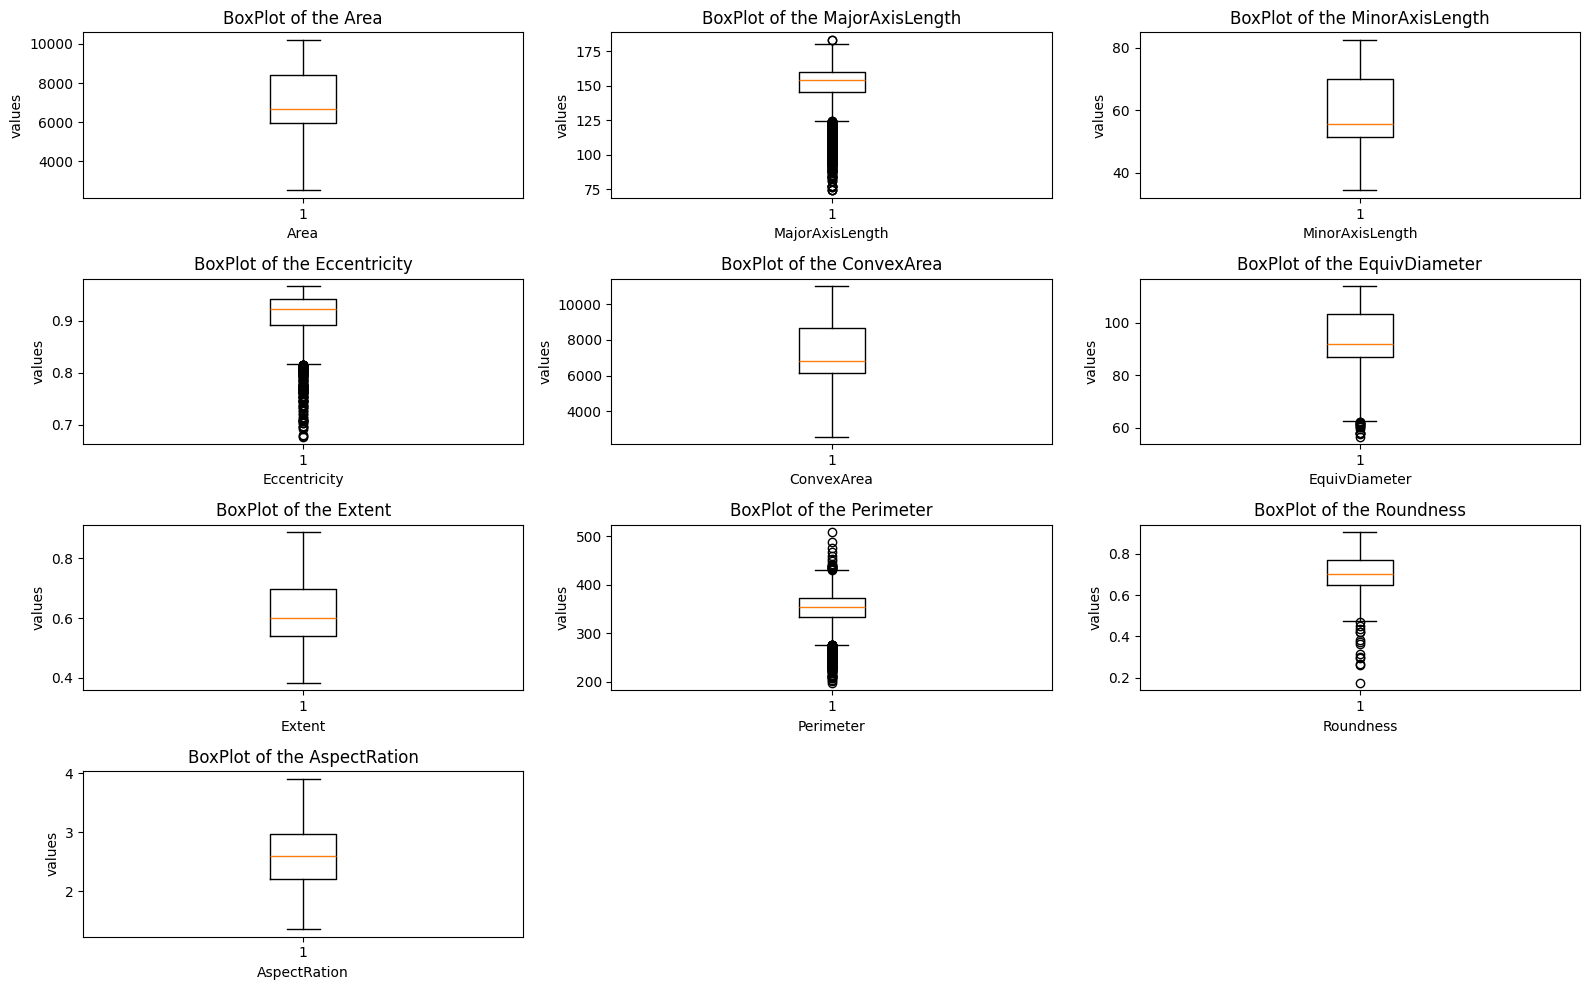

In [11]:
# Box plot the columns
plt.figure(figsize = (16,10))
for i, col in enumerate(df.columns[0:10]):
    plt.subplot(4,3, i+1)
    plt.boxplot(df[col])
    plt.title(f"BoxPlot of the {col}")
    plt.xlabel(col)
    plt.ylabel("values")

plt.tight_layout()
plt.show()

In [12]:
# function for detecting the outliers values
def detect_outliers(df):
    outliers = {}

    for col in df.columns:
        Q1 = df[col].quantile(0.25) # 25th quantile
        Q2 = df[col].quantile(0.5) # Median
        Q3 = df[col].quantile(0.75) # 75th quantile

        IQR = Q3 - Q1 # interquantile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers


In [13]:
outliers_dict = detect_outliers(df.iloc[:, 0:10])
outliers = pd.concat(outliers_dict.values(), ignore_index=True)
outliers

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000
...,...,...,...,...,...,...,...,...,...,...
1014,4620,153.288068,43.598410,0.958699,5603,76.696589,0.500325,442.959,0.295886,3.515910
1015,4434,150.442219,41.478578,0.961241,5661,75.136836,0.421964,421.126,0.314182,3.626986
1016,6908,152.113528,64.189376,0.906604,7821,93.784534,0.528700,476.522,0.382293,2.369762
1017,6706,146.533085,59.151624,0.914903,7064,92.403162,0.602949,424.130,0.468463,2.477245


In [14]:
print("Number of Outliers in the dataset is = ",outliers.shape[0])

Number of Outliers in the dataset is =  1019


In [15]:
# Get the indices from the outliers dictionary
outlier_indices = []
for column_outliers in outliers_dict.values():
    outlier_indices.extend(column_outliers.index)

# Drop rows based on those indices
df.drop(outlier_indices, inplace=True)


In [16]:
print(f"Number of row {df.shape[0]} and columns {df.shape[1]} after removing outliers")

Number of row 17607 and columns 11 after removing outliers


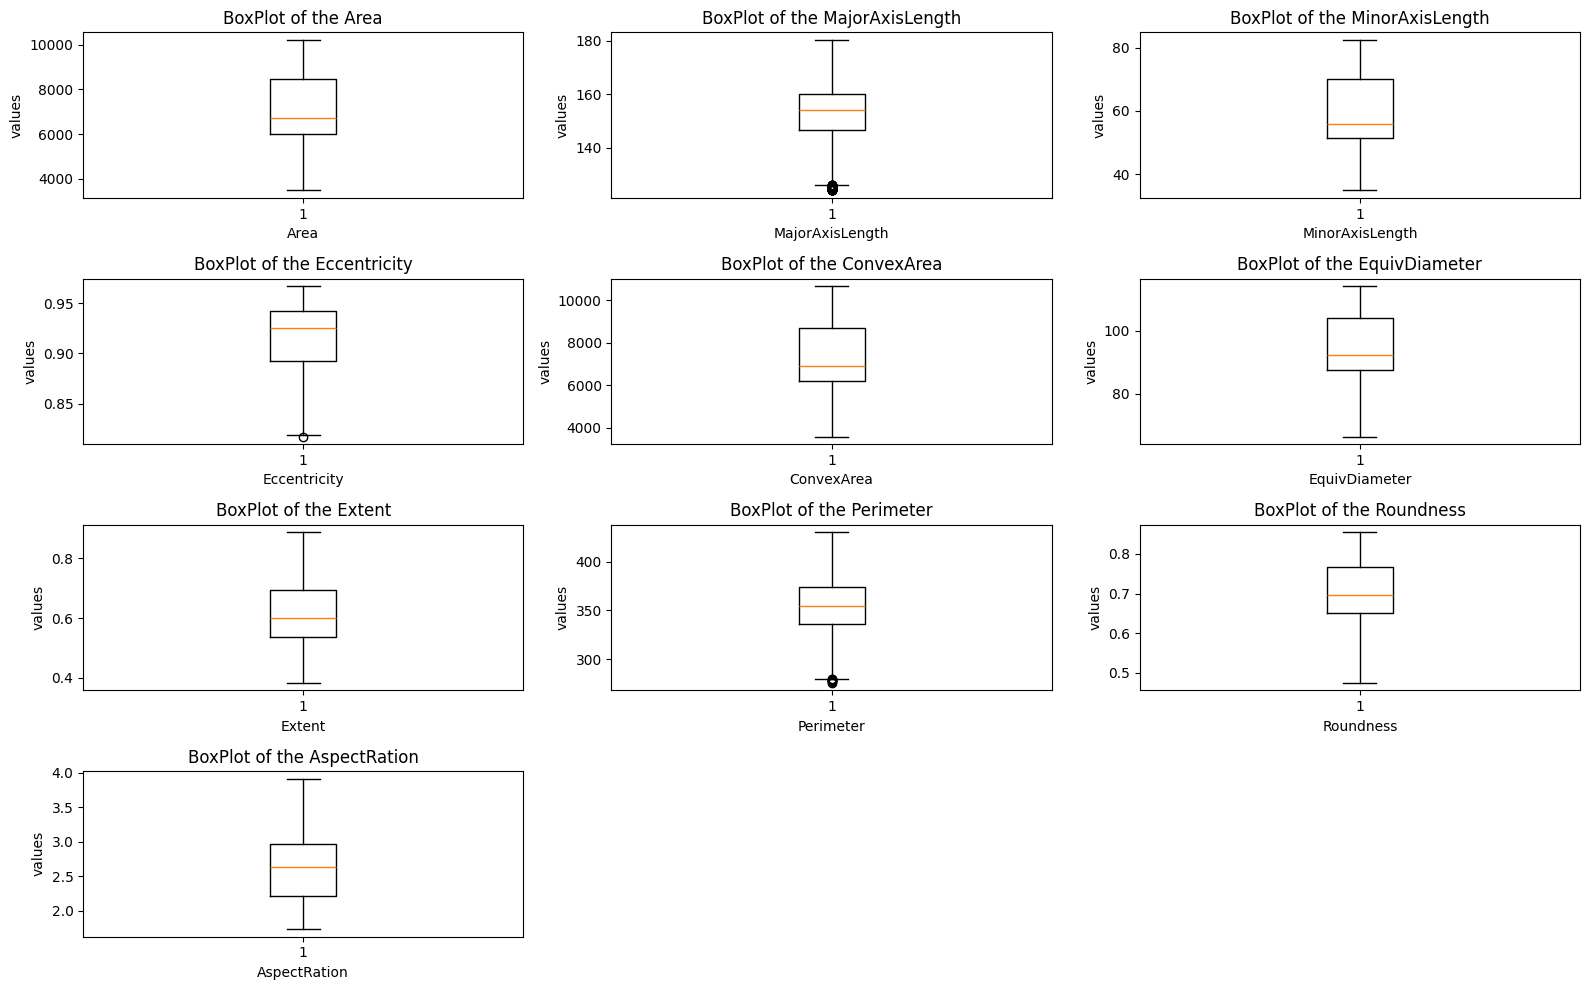

In [17]:
# After removing Outliers
plt.figure(figsize = (16,10))
for i, col in enumerate(df.columns[0:10]):
    plt.subplot(4,3, i+1)
    plt.boxplot(df[col])
    plt.title(f"BoxPlot of the {col}")
    plt.xlabel(col)
    plt.ylabel("values")

plt.tight_layout()
plt.show()

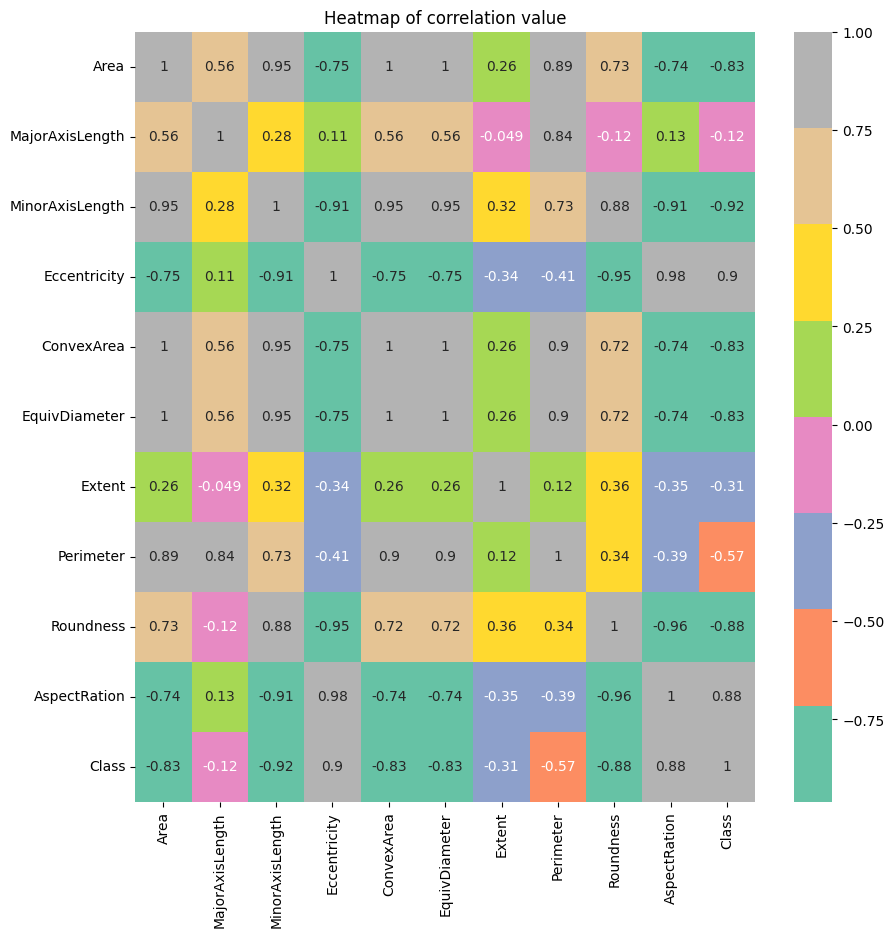

In [18]:
# heatmap of the correlation values
correlation = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cmap = "Set2", annot=True)
plt.title("Heatmap of correlation value")
plt.show()

# Model Building

In [ ]:
# seprate the input feature and target value
X = df.iloc[:,1:10]
y = df.iloc[:,-1]

In [24]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [25]:
# Scaling the data
trf = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,10))
])
trf

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 slice(0, 10, None))])

In [26]:
pipe1 = Pipeline(steps = [
    ('trf', trf),  
    ('trf1', DecisionTreeClassifier(random_state=42))
])

In [27]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf1', DecisionTreeClassifier(random_state=42))])

In [28]:
pipe2 = Pipeline(steps=[
    ("trf", trf),
    ("trf2", RandomForestClassifier(n_estimators = 300, n_jobs = -1))
])

In [29]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf2', RandomForestClassifier(n_estimators=300, n_jobs=-1))])

In [30]:
pipe3 = Pipeline(steps=[
    ("trf", trf),
    ("trf3", GradientBoostingClassifier(n_estimators = 300))
])

In [31]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf3', GradientBoostingClassifier(n_estimators=300))])

In [32]:
clf = StackingClassifier(
    estimators = [
        ("rf", RandomForestClassifier()),
        ("gbc",GradientBoostingClassifier()),
        ("dtc",DecisionTreeClassifier())
    ],
    final_estimator=RandomForestClassifier(),
    cv=5,
    n_jobs= 4
)

In [33]:
pipe4 = Pipeline(steps=[
    ("trf", trf),
    ("trf4", clf)
])

In [34]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 StackingClassifier(cv=5,
                                    estimators=[('rf',
                                                 RandomForestClassifier()),
                                                ('gbc',
                                                 GradientBoostingClassifier()),
                                                ('dtc',
                                                 DecisionTreeClassifier())],
                                    final_estimator=RandomForestClassifier(),
                                    n_jobs=4))])

# Evaluation

In [35]:
y_pred_dt = pipe1.predict(X_test)
y_pred_rf = pipe2.predict(X_test)
y_pred_gb = pipe3.predict(X_test)
y_pred_st = pipe4.predict(X_test)

## For Decition Tree Classifier

In [36]:
# Accuracy Score, Roc-Auc Score for Decision tree
print("Accuracy_score using Decision tree Classifier :" , accuracy_score(y_test, y_pred_dt))
print("Auc-ROc Curve value using Decision tree Classifier :" , roc_auc_score(y_test, y_pred_dt))

Accuracy_score using Decision tree Classifier : 0.9823938662501774
Auc-ROc Curve value using Decision tree Classifier : 0.9823270127630901


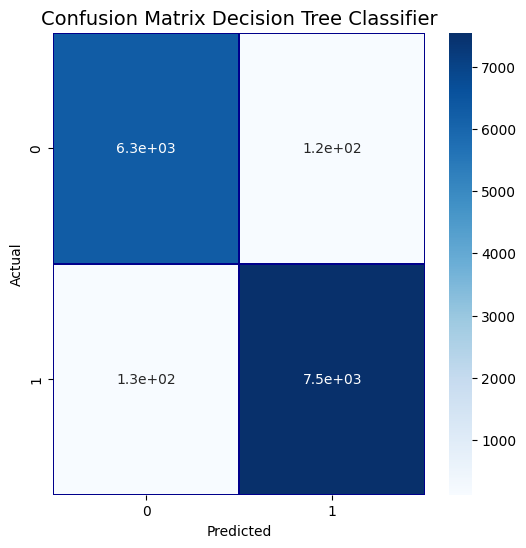

In [37]:
cm = pd.crosstab(y_test, y_pred_dt, rownames = ["Actual"], colnames = ["Predicted"])
fig, (ax) = plt.subplots(ncols = 1, figsize = (6,6))
sns.heatmap(cm,
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree Classifier', fontsize=14)
plt.show()

## For Random Forest Classifier

In [38]:
print("Accuracy_score using Random Forest Classifier :" , accuracy_score(y_test, y_pred_rf))
print("Auc-ROc Curve value using Random Forest Classifier :" , roc_auc_score(y_test, y_pred_rf))

Accuracy_score using Random Forest Classifier : 0.9886412040323725
Auc-ROc Curve value using Random Forest Classifier : 0.988367423957875


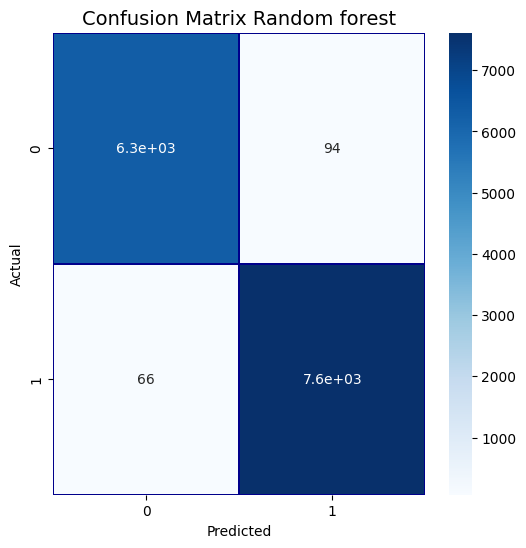

In [39]:
# Comfusion Metrix for Random forest
cm = pd.crosstab(y_test, y_pred_rf, rownames = ["Actual"], colnames = ["Predicted"])
fig, (ax) = plt.subplots(ncols = 1, figsize = (6,6))
sns.heatmap(cm,
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random forest', fontsize=14)
plt.show()

## For Gradient Boosting Classifier

In [40]:
print("Accuracy_score using For Gradient Boosting Classifier :" , accuracy_score(y_test, y_pred_gb))
print("Auc-ROc Curve value using For Gradient Boosting Classifier :" , roc_auc_score(y_test, y_pred_gb))

Accuracy_score using For Gradient Boosting Classifier : 0.9875053244356098
Auc-ROc Curve value using For Gradient Boosting Classifier : 0.9873125796128115


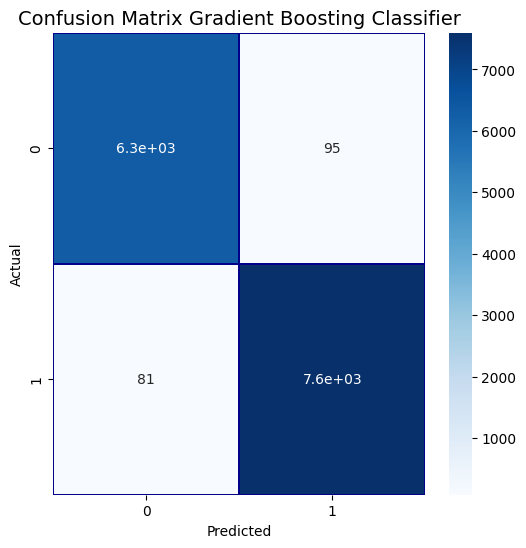

In [41]:
# Comfusion Metrix for Gradient Boosting Classifier
cm = pd.crosstab(y_test, y_pred_gb, rownames = ["Actual"], colnames = ["Predicted"])
fig, (ax) = plt.subplots(ncols = 1, figsize = (6,6))
sns.heatmap(cm,
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Gradient Boosting Classifier', fontsize=14)
plt.show()

## Stacking Classifier

In [42]:
print("Accuracy_score using For Stacking Classifier :" , accuracy_score(y_test, y_pred_st))
print("Auc-ROc Curve value using For Stacking Classifier :" , roc_auc_score(y_test, y_pred_st))

Accuracy_score using For Stacking Classifier : 0.9854465426664774
Auc-ROc Curve value using For Stacking Classifier : 0.9851014084699413


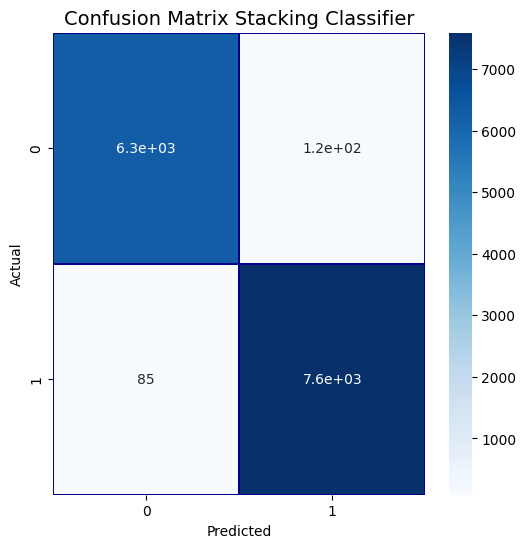

In [43]:
# Comfusion Metrix for Stacking Classifier
cm = pd.crosstab(y_test, y_pred_st, rownames = ["Actual"], colnames = ["Predicted"])
fig, (ax) = plt.subplots(ncols = 1, figsize = (6,6))
sns.heatmap(cm,
            annot=True,ax=ax,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Stacking Classifier', fontsize=14)
plt.show()

In [44]:
profomace = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting", "Stacking Classifier"],
    "Accuracy Score" : [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_st)],
    "Roc Auc Score": [roc_auc_score(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_gb), roc_auc_score(y_test, y_pred_st)]
}
)

In [45]:
profomace

,Model,Accuracy Score,Roc Auc Score
0,Decision Tree,0.982394,0.982327
1,Random Forest,0.988641,0.988367
2,Gradient Boosting,0.987505,0.987313
3,Stacking Classifier,0.985447,0.985101


In [ ]:
profomace.sort_values(by=["Accuracy Score", "Roc Auc Score"], ascending=False)

,Model,Accuracy Score,Roc Auc Score
1,Random Forest,0.988641,0.988367
2,Gradient Boosting,0.987505,0.987313
3,Stacking Classifier,0.985447,0.985101
0,Decision Tree,0.982394,0.982327


# ANN Using TensorFlow Keras

In [48]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [49]:
X = df.iloc[:,1:10]
y = df.iloc[:,-1]

In [50]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

In [51]:
scale = StandardScaler() 
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)
X_val_scale = scale.transform(X_val)

In [52]:
model = Sequential()

# Input Layer
model.add(Dense(10, input_dim = X_train.shape[1], kernel_initializer = "he_normal", use_bias = False))

# Hidden Layers  (4 Hidden Layer)
model.add(Dense(5, activation = "relu"))


# Output Layer
model.add(Dense(1, activation = 'sigmoid'))


/opt/anaconda3/envs/venv3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
adam = Adam(learning_rate = 0.01)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])

In [54]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = 'auto'
)

In [55]:
history = model.fit(X_train_scale, y_train, validation_data = [X_val_scale, y_val], epochs=100, batch_size = 32, callbacks=callback)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9744 - loss: 0.0917 - val_accuracy: 0.9892 - val_loss: 0.0341
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9880 - loss: 0.0377 - val_accuracy: 0.9908 - val_loss: 0.0361
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.9898 - loss: 0.0363 - val_accuracy: 0.9897 - val_loss: 0.0357
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9881 - val_loss: 0.0362
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9869 - loss: 0.0325 - val_accuracy: 0.9892 - val_loss: 0.0368
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9886 - loss: 0.0346 - val_accuracy: 0.9908 - val_loss: 0.0357
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9863 - loss: 0.0400 - val_accuracy: 0.9876 - val_loss: 0.0371
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9872 - loss: 0

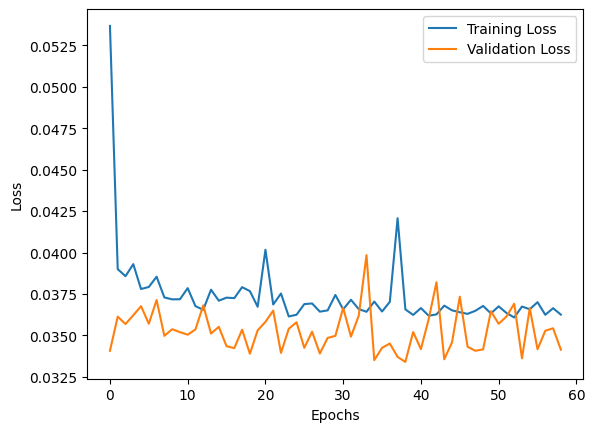

In [56]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

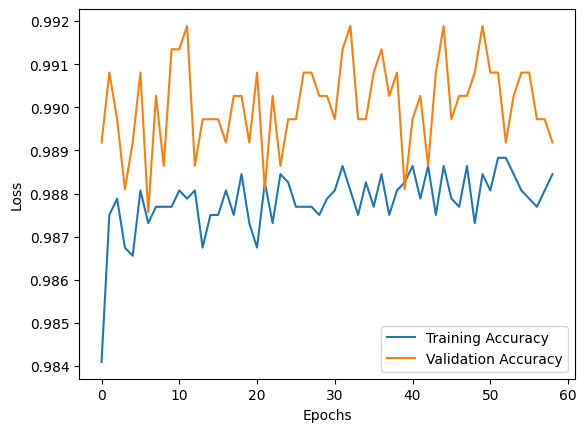

In [57]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
y_pred_ann = model.predict(X_test_scale)

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


In [59]:
# Threshold to get binary predictions
y_pred_ann = (y_pred_ann > 0.5).astype(int)

In [60]:
print(f"Accuracy score using ANN (TensorFlow/Keras) is: {accuracy_score(y_test, y_pred_ann):.4f}")


Accuracy score using ANN (TensorFlow/Keras) is: 0.9905


# ANN Using PyTorch

In [61]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [62]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [63]:
# If they're pandas DataFrame/Series, convert to numpy arrays
X_train_scale = X_train_scale.values if hasattr(X_train_scale, "values") else X_train_scale
y_train = y_train.values if hasattr(y_train, "values") else y_train

X_test_scale = X_test_scale.values if hasattr(X_test_scale, "values") else X_test_scale
y_test = y_test.values if hasattr(y_test, "values") else y_test

X_val_scale = X_val_scale.values if hasattr(X_val_scale, "values") else X_val_scale
y_val = y_val.values if hasattr(y_val, "values") else y_val


In [64]:
train_dataset = CustomDataset(X_train_scale, y_train)
test_dataset = CustomDataset(X_test_scale, y_test)
val_dataset = CustomDataset(X_val_scale, y_val)

In [65]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

In [66]:
print(f"Number of batch = {len(train_loader)}")

Number of batch = 166


In [67]:
class ANN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 10),
            nn.ReLU(),
            nn.Linear(10,1),
            nn.Sigmoid()
        )
    
    def forward(self,X):
        return self.model(X)

In [68]:
learning_rate = 0.001
epochs = 10

In [69]:
class MyModel(nn.Module):
    def __init__(self, num_features):
        super(MyModel, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features, 10),
            nn.ReLU(),
            nn.Linear(10,1),
            nn.Sigmoid()
        )

    def forward(self, X):
        return self.model(X)

In [70]:
from torch.optim import Adam 

In [71]:
model = MyModel(num_features=X_train.shape[1])  # pass number of features

criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [72]:
for epoch in range(epochs):
    total_train_loss = 0
    total_train_accu_score = 0
    total_val_loss = 0
    total_val_accu_score = 0

    model.train() 
    for features, labels in train_loader:
        labels = labels.float()

        optimizer.zero_grad()  
        output = model(features).squeeze(1)
        loss = criterion(output, labels)
        total_train_loss += loss.item()

        acc = (output.round() == labels).sum().item()
        total_train_accu_score += acc

        loss.backward()  
        optimizer.step()  

    model.eval()  
    with torch.no_grad():  
        for features, labels in val_loader:
            labels = labels.float()

            output = model(features).squeeze(1)
            loss = criterion(output, labels)
            total_val_loss += loss.item()

            acc = (output.round() == labels).sum().item()
            total_val_accu_score += acc

    # Calculate average losses and accuracy for the epoch
    train_loss_avg = total_train_loss / len(train_loader)
    train_accuracy_avg = (total_train_accu_score / len(train_loader.dataset)) * 100
    val_loss_avg = total_val_loss / len(val_loader)
    val_accuracy_score = (total_val_accu_score / len(val_loader.dataset)) * 100

    # Print results for the epoch
    print(f"Epoch {epoch + 1} | Train Loss: {train_loss_avg:.4f} | Train Acc: {train_accuracy_avg:.2f}% | Val Loss: {val_loss_avg:.4f} | Val Acc: {val_accuracy_score:.2f}%")
    print("*" * 100)


Epoch 1 | Train Loss: 0.3553 | Train Acc: 95.83% | Val Loss: 0.1717 | Val Acc: 98.81%
****************************************************************************************************
Epoch 2 | Train Loss: 0.1113 | Train Acc: 98.50% | Val Loss: 0.0725 | Val Acc: 98.86%
****************************************************************************************************
Epoch 3 | Train Loss: 0.0609 | Train Acc: 98.62% | Val Loss: 0.0491 | Val Acc: 98.97%
****************************************************************************************************
Epoch 4 | Train Loss: 0.0475 | Train Acc: 98.62% | Val Loss: 0.0412 | Val Acc: 98.92%
****************************************************************************************************
Epoch 5 | Train Loss: 0.0430 | Train Acc: 98.67% | Val Loss: 0.0379 | Val Acc: 98.97%
****************************************************************************************************
Epoch 6 | Train Loss: 0.0407 | Train Acc: 98.69% | Val Loss: 0.03

In [73]:
with torch.no_grad():
    total_test_loss = 0
    total_test_accuracy = 0
    total_samples = 0  # To keep track of total samples processed
    
    for data in test_loader:
        inputs, labels = data
        labels = labels.float() # labels in float dtype for BCELoss
        output = model(inputs).squeeze(1) 

        # Calculate batch loss
        batch_test_loss = criterion(output, labels)
        total_test_loss += batch_test_loss.item()

        # Calculate batch accuracy
        batch_accuracy = (output.round() == labels).sum().item()  
        total_test_accuracy += batch_accuracy  

        total_samples += labels.size(0)  # Update total number of samples

    # Calculate average loss and accuracy
    average_test_loss = total_test_loss / len(test_loader)
    average_test_accuracy = (total_test_accuracy / total_samples) * 100  

    print(f"Accuracy score on test dataset is: {average_test_accuracy:.2f}% and Loss on test dataset is: {average_test_loss:.4f}")


Accuracy score on test dataset is: 99.12% and Loss on test dataset is: 0.0299
